In [1]:
import numpy as np
import pandas as pd
import scipy
import psycopg2

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import os
import json
from collections import Counter

In [2]:
def parse_testdata(path='../data/rainfall-submissions.tsv'):
    file = open(path,'r')
    raw = file.readlines()
    file.close()
    res = dict()
    exid = "3c79c115-0f5f-4d8e-b02c-b4b33155a4b3"
    get_code = lambda data: data["mooc-2017-ohjelmointi"]["osa02-Osa02_16.MarsinLampotilanKeskiarvo"]["/src/MarsinLampotilanKeskiarvo.java"]
    for line in raw:
        id = line[:len(exid)]
        body = json.loads(line[len(exid):])
        res[id] = get_code(body)
    return res

def parse_testdata_df(path='../data/rainfall-submissions.tsv'):
    file = open(path,'r')
    raw = file.readlines()
    file.close()
    ids = [None] * len(raw)
    code = [None] * len(raw)
    exid = "3c79c115-0f5f-4d8e-b02c-b4b33155a4b3"
    get_code = lambda data: data["mooc-2017-ohjelmointi"]["osa02-Osa02_16.MarsinLampotilanKeskiarvo"]["/src/MarsinLampotilanKeskiarvo.java"]
    for i, line in enumerate(raw):
        id = line[:len(exid)]
        body = json.loads(line[len(exid):])
        ids[i] = id
        code[i] = get_code(body)
    return pd.DataFrame({ "ids": ids, "code": code })

rain = parse_testdata()
rain_df = parse_testdata_df()

In [3]:
rain_df

,ids,code
0,b4df7baf-1ba2-4a67-8b82-dabc5a1a0bb8,\nimport java.util.Scanner;\n\npublic class Ma...
1,63fd29ed-dee9-451c-8cbe-3f3a43f6fdfa,\nimport java.util.Scanner;\n\npublic class Ma...
2,c73969d7-b7f6-43b6-a2a9-6b88cc0dfd7d,\nimport java.util.Scanner;\n\npublic class Ma...
3,a7970347-f720-472f-9b2d-e4dbdc8c604c,\nimport java.util.Scanner;\n\npublic class Ma...
4,3c79c115-0f5f-4d8e-b02c-b4b33155a4b3,\nimport java.util.Scanner;\n\npublic class Ma...
...,...,...
105,882c27f5-de45-4b6d-babb-3a27651f2c1b,\nimport java.util.Scanner;\n\npublic class Ma...
106,98e7d004-4383-4865-8555-40459fd920cb,\nimport java.util.Scanner;\n\npublic class Ma...
107,20adf8ba-6111-4faf-ab1c-7bf5391836d4,\nimport java.util.Scanner;\n\npublic class Ma...
108,4a6045bc-8c22-45ed-950e-d6595c77a686,\nimport java.util.Scanner;\n\npublic class Ma...


In [4]:
print(rain['b4df7baf-1ba2-4a67-8b82-dabc5a1a0bb8'])


import java.util.Scanner;

public class MarsinLampotilanKeskiarvo {

    public static void main(String[] args) {
        Scanner lukija = new Scanner(System.in);
        
        int summa = 0;
        int syotteet = 0;
        
        while (true) {
            System.out.print("Syötä luku: ");
            int syote = Integer.parseInt(lukija.nextLine());
            
            if (syote == 9999) {
                break;
            } else if (syote <= 20 && syote >= -140) {
                summa += syote;
                syotteet++;
            }
        }
        
        System.out.println("Mittausten keskiarvo: " 
                            + (double) summa / syotteet );
    }
}



In [5]:
import antlr4
from antlr_local.generated.JavaLexer import JavaLexer
from antlr_local.generated.JavaParser import JavaParser
from antlr_local.generated.JavaParserListener import JavaParserListener
from antlr_local.MyListener import KeyPrinter
from antlr_local.TreeListener import TreeListener, Node
from antlr_local.java_tokens import tokenTypes, interestingTokenTypes, rareTokenTypes
from antlr_local.java_parsers import parse_ast_complete, parse_ast_keywords, parse_ast_modified

import pprint

from antlr4 import RuleContext

from collections import Counter

code = rain['b4df7baf-1ba2-4a67-8b82-dabc5a1a0bb8']
code2 = rain['a7970347-f720-472f-9b2d-e4dbdc8c604c']

def parse_tree(code):
    code_stream = antlr4.InputStream(code)
    lexer = JavaLexer(code_stream)
    token_stream = antlr4.CommonTokenStream(lexer)
    parser = JavaParser(token_stream)
    tree = parser.compilationUnit()
    return tree

tree = parse_tree(code)
tree2 = parse_tree(code2)

printer = KeyPrinter()
treeListener = TreeListener()

walker = antlr4.ParseTreeWalker()
walker.walk(printer, tree)

walker.walk(treeListener, tree)
t1 = treeListener.get_tree()

treeListener.reset()
walker.walk(treeListener, tree2)
t2 = treeListener.get_tree()

In [6]:
print(str(t1))

 0:root
  1:IMPORT  
  1:CLASS{  
   2:VOID    
   2:METHOD{ 
    3:VARDEF 
    3:ASSIGN  
    3:NEWCLASS
    3:VARDEF 
    3:ASSIGN  
    3:VARDEF 
    3:ASSIGN  
    3:LOOP{ 
     4:APPLY   
     4:VARDEF 
     4:ASSIGN  
     4:APPLY   
     4:APPLY   
     4:IF{     
      5:ASSIGN  
      5:BREAK   
      5:IF{     
       6:ASSIGN  
       6:ASSIGN  
       6:ASSIGN  
      5:}IF     
     4:}IF     
    3:}LOOP 
    3:APPLY   
   2:}METHOD 
  1:}CLASS  


In [7]:
print(str(t2))

 0:root
  1:IMPORT  
  1:CLASS{  
   2:VOID    
   2:METHOD{ 
    3:VARDEF 
    3:ASSIGN  
    3:NEWCLASS
    3:VARDEF 
    3:ASSIGN  
    3:VARDEF 
    3:ASSIGN  
    3:LOOP{ 
     4:APPLY   
     4:VARDEF 
     4:ASSIGN  
     4:APPLY   
     4:APPLY   
     4:IF{     
      5:ASSIGN  
      5:BREAK   
      5:IF{     
       6:ASSIGN  
      5:}IF     
     4:}IF     
    3:}LOOP 
    3:APPLY   
   2:}METHOD 
  1:}CLASS  


In [11]:
print(printer.get_result())

IMPORT  
CLASS{  
VOID    
METHOD{ 
VARDEF 
ASSIGN  
NEWCLASS
VARDEF 
ASSIGN  
VARDEF 
ASSIGN  
LOOP{ 
APPLY   
VARDEF 
ASSIGN  
APPLY   
APPLY   
IF{     
ASSIGN  
BREAK   
IF{     
ASSIGN  
ASSIGN  
ASSIGN  
}IF     
}IF     
}LOOP 
APPLY   
}METHOD 
}CLASS  



In [12]:
from zss import simple_distance, Node as ZNode

def genZssTree(node):
    n = ZNode(node.label)
    for c in node.children:
        n.addkid(genZssTree(c))
    return n
    
tz1 = genZssTree(t1)
tz2 = genZssTree(t2)

In [13]:
simple_distance(tz1, tz2)

2.0

In [31]:
class Node(object):
    def __init__(self, parent, label, depth=0):
        self.label = label
        self.children = []
        self.parent = parent
        self.depth = depth

    def addChild(self, node):
        self.children.append(node)
        return self
    
    def getParent(self):
        return self.parent

    def toList(self):
        return [self.label] + [l for lst in [c.toList() for c in self.children] for l in lst]
    
    def __str__(self):
        n = f'{self.depth}:{self.label}'
        s = '\n'.join([n]+[str(c) for c in self.children])
        padding = ' ' * self.depth
        return f'{padding} {s}'
    
    def __len__(self):
        return 1 + sum([len(c) for c in self.children])

def getRule(antlrNode, parser):
    return parser.ruleNames[antlrNode.getRuleIndex()]
    
def getTokenType(n):
    t = n.getSymbol().type
    if t in tokenTypes:
        return tokenTypes[t]
    return None

def generate_complete_tree(parentNode, antlrNode, parser):
    name = getRule(antlrNode, parser)
    depth = antlrNode.depth()
    n = Node(parentNode, name, depth)
    for child in antlrNode.children:
        if hasattr(child, 'getRuleIndex'):
            n.addChild(generate_complete_tree(n, child, parser))
        elif hasattr(child, 'getSymbol'):
            token_type = getTokenType(child)
            if token_type:
                n.addChild(Node(parentNode, token_type, depth + 1))
        else:
            print('unknown node')
    return n

def parse_complete_tree(code):
    code_stream = antlr4.InputStream(code)
    lexer = JavaLexer(code_stream)
    token_stream = antlr4.CommonTokenStream(lexer)
    parser = JavaParser(token_stream)
    tree = parser.compilationUnit()
    t = generate_complete_tree(Node(None, 'root', 0), tree, parser)
    return t

t = parse_complete_tree(code)

In [32]:
l = t.toList()
l

['compilationUnit',
 'importDeclaration',
 'IMPORT',
 'qualifiedName',
 'IDENTIFIER',
 'DOT',
 'IDENTIFIER',
 'DOT',
 'IDENTIFIER',
 'SEMI',
 'typeDeclaration',
 'classOrInterfaceModifier',
 'PUBLIC',
 'classDeclaration',
 'CLASS',
 'IDENTIFIER',
 'classBody',
 'LBRACE',
 'classBodyDeclaration',
 'modifier',
 'classOrInterfaceModifier',
 'PUBLIC',
 'modifier',
 'classOrInterfaceModifier',
 'STATIC',
 'memberDeclaration',
 'methodDeclaration',
 'typeTypeOrVoid',
 'VOID',
 'IDENTIFIER',
 'formalParameters',
 'LPAREN',
 'formalParameterList',
 'formalParameter',
 'typeType',
 'classOrInterfaceType',
 'IDENTIFIER',
 'LBRACK',
 'RBRACK',
 'variableDeclaratorId',
 'IDENTIFIER',
 'RPAREN',
 'methodBody',
 'block',
 'LBRACE',
 'blockStatement',
 'localVariableDeclaration',
 'typeType',
 'classOrInterfaceType',
 'IDENTIFIER',
 'variableDeclarators',
 'variableDeclarator',
 'variableDeclaratorId',
 'IDENTIFIER',
 'ASSIGN',
 'variableInitializer',
 'expression',
 'NEW',
 'creator',
 'createdName'

In [203]:
from zss import simple_distance, Node as ZNode

def getTokenType(n):
    t = n.getSymbol().type
    if t in tokenTypes:
        return tokenTypes[t]
    print(f'unknown {t}')
    return f'unknown {t}'

def generate_tree(parentNode, antlrNode):
    name = parser.ruleNames[antlrNode.getRuleIndex()]
    depth = antlrNode.depth()
    n = Node(parentNode, name, depth)
    for child in antlrNode.children:
        if hasattr(child, 'getRuleIndex'):
            n.addChild(generate_tree(n, child))
        elif hasattr(child, 'getSymbol'):
            n.addChild(Node(parentNode, getTokenType(child), depth + 1))
        else:
            print('unknown node')
    return n

def generate_ztree(parentNode, antlrNode):
    name = parser.ruleNames[antlrNode.getRuleIndex()]
    depth = antlrNode.depth()
    n = ZNode(name)
    for child in antlrNode.children:
        if hasattr(child, 'getRuleIndex'):
            n.addkid(generate_tree(n, child))
        elif hasattr(child, 'getSymbol'):
            n.addkid(ZNode(getTokenType(child)))
        else:
            print('unknown node')
    return n

root = Node(None, 'root', 0)
t = generate_tree(root, tree)
t2 = generate_tree(root, tree2)
tz1 = generate_ztree(ZNode('root'), tree)
tz2 = generate_ztree(ZNode('root'), tree2)

unknown -1
unknown -1
unknown -1
unknown -1


In [205]:
len(t)

122

In [193]:
simple_distance(tz1, tz2)

63.0

In [194]:
print(str(t))

  1:compilationUnit
   2:importDeclaration
    3:IMPORT
    3:qualifiedName
     4:IDENTIFIER
     4:DOT
     4:IDENTIFIER
     4:DOT
     4:IDENTIFIER
    3:SEMI
   2:typeDeclaration
    3:classOrInterfaceModifier
     4:PUBLIC
    3:classDeclaration
     4:CLASS
     4:IDENTIFIER
     4:classBody
      5:LBRACE
      5:classBodyDeclaration
       6:modifier
        7:classOrInterfaceModifier
         8:PUBLIC
       6:modifier
        7:classOrInterfaceModifier
         8:STATIC
       6:memberDeclaration
        7:methodDeclaration
         8:typeTypeOrVoid
          9:VOID
         8:IDENTIFIER
         8:formalParameters
          9:LPAREN
          9:formalParameterList
           10:formalParameter
            11:typeType
             12:classOrInterfaceType
              13:IDENTIFIER
             12:LBRACK
             12:RBRACK
            11:variableDeclaratorId
             12:IDENTIFIER
          9:RPAREN
         8:methodBody
          9:block
           10:LBRACE
       

In [109]:
print(rain['b4df7baf-1ba2-4a67-8b82-dabc5a1a0bb8'])


import java.util.Scanner;

public class MarsinLampotilanKeskiarvo {

    public static void main(String[] args) {
        Scanner lukija = new Scanner(System.in);
        
        int summa = 0;
        int syotteet = 0;
        
        while (true) {
            System.out.print("Syötä luku: ");
            int syote = Integer.parseInt(lukija.nextLine());
            
            if (syote == 9999) {
                break;
            } else if (syote <= 20 && syote >= -140) {
                summa += syote;
                syotteet++;
            }
        }
        
        System.out.println("Mittausten keskiarvo: " 
                            + (double) summa / syotteet );
    }
}



# Model

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn import manifold
from sklearn.cluster import DBSCAN, OPTICS, KMeans

import hdbscan
import umap

import antlr4
from antlr4 import RuleContext

from antlr_local.generated.JavaLexer import JavaLexer
from antlr_local.generated.JavaParser import JavaParser
from antlr_local.generated.JavaParserListener import JavaParserListener
from antlr_local.MyListener import KeyPrinter
from antlr_local.TreeListener import TreeListener, Node
from antlr_local.java_tokens import tokenTypes, interestingTokenTypes, rareTokenTypes
from antlr_local.java_parsers import parse_ast_complete, parse_ast_keywords, parse_ast_modified

from antlr_local.java_parsers import parse_ast_complete, parse_ast_keywords, parse_ast_modified
from zss import simple_distance, Node as ZNode

def parse_testdata(path='../data/rainfall-submissions.tsv'):
    file = open(path,'r')
    raw = file.readlines()
    file.close()
    res = dict()
    exid = "3c79c115-0f5f-4d8e-b02c-b4b33155a4b3"
    get_code = lambda data: data["mooc-2017-ohjelmointi"]["osa02-Osa02_16.MarsinLampotilanKeskiarvo"]["/src/MarsinLampotilanKeskiarvo.java"]
    for line in raw:
        id = line[:len(exid)]
        body = json.loads(line[len(exid):])
        res[id] = get_code(body)
    return res

def counts_to_id_dict(ids, counts):
    d = {}
    for i, c in enumerate(counts):
        if None in c:
            c.pop(None)
        if len(c) != 0:
            d[ids[i]] = dict(c)
    return d

def create_clusters(labels, submissionIds):
    res = {}
    for c in set(labels):
        res[c] = [submissionIds[idx] for idx, label in enumerate(labels) if label == c]
    return res

def genZssTree(node):
    n = ZNode(node.label)
    for c in node.children:
        n.addkid(genZssTree(c))
    return n

def parse_to_tree(code):
    code_stream = antlr4.InputStream(code)
    lexer = JavaLexer(code_stream)
    token_stream = antlr4.CommonTokenStream(lexer)
    parser = JavaParser(token_stream)
    tree = parser.compilationUnit()

    treeListener = TreeListener()
    walker = antlr4.ParseTreeWalker()
    walker.walk(treeListener, tree)

    t = genZssTree(treeListener.get_tree())
    return t

def parse_ast(codeList):
    return [parse_to_tree(c) for c in codeList]

def cluster_dist_matrix(dist_matrix, clustering_params):
    params = clustering_params or {}
    name = params.get('name')
    if name == 'DBSCAN' or name is None:
        min_samples = params.get('min_samples') or 5
        eps = params.get('eps') or 0.5
        metric = 'precomputed'
        dbscan = DBSCAN(min_samples=min_samples, metric=metric, eps=eps).fit(dist_matrix)
        return dbscan.labels_
    elif name == 'HDBSCAN':
        min_cluster_size = params.get('min_cluster_size') or 2
        min_samples = params.get('min_samples') or 5
        metric = 'precomputed'
        show_linkage_tree = params.get('show_linkage_tree') or False
        clusterer = hdbscan.HDBSCAN(
            min_cluster_size=min_cluster_size,
            min_samples=min_samples,
            metric=metric,
            gen_min_span_tree=show_linkage_tree
        )
        clusterer.fit(dist_matrix)
        #plt.figure(3, figsize=(24,8)) 
        #clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
        return clusterer.labels_
    elif name == 'OPTICS':
        min_samples = params.get('min_samples') or 5
        max_eps = params.get('max_eps') or np.inf
        if int(max_eps) == -1:
            max_eps = np.inf
        metric = 'precomputed'
        optics = OPTICS(min_samples=min_samples, metric=metric, max_eps=max_eps).fit(dist_matrix)
        return optics.labels_
    elif name == 'KMeans':
        n_clusters = params.get('k_clusters') or 8
        kmeans = KMeans(n_clusters=n_clusters).fit(dist_matrix)
        return kmeans.labels_
    else:
        raise ValueError(f'cluster_dist_matrix(): Unknown clustering method name: {name}')

def reduce_to_2d(tfidf, dim_visualization_params={}):
    params = dim_visualization_params or {}
    name = params.get('name')
    if name == 'UMAP':
        n_neighbors = params.get('n_neighbors') or 30
        min_dist = params.get('min_dist') or 0.0
        return umap.UMAP(
            n_components=2,
            n_neighbors=n_neighbors,
            min_dist=min_dist,
        ).fit_transform(tfidf)
    else:
        perplexity = params.get('perplexity') or 30
        svd_n_components = params.get('svd_n_components')
        matrix = tfidf
        if svd_n_components is not None:
            matrix = TruncatedSVD(
                n_components=svd_n_components,
                random_state=0
            ).fit_transform(tfidf)
        return TSNE(
            n_components=2,
            perplexity=perplexity
        ).fit_transform(matrix)

def run_ted(submissionIds, codeList, token_set='modified', random_seed=-1,
              clustering_params={}, dim_visualization_params={}):

    documents = len(codeList)
    df =  pd.DataFrame({ "trees": parse_ast(codeList), "ids": submissionIds })

    if random_seed != -1:
        np.random.seed(random_seed)

    return df


In [2]:
import psycopg2
from dotenv import load_dotenv

import os
import json

load_dotenv()

POSTGRES_HOST = os.getenv("DB_HOST")
POSTGRES_PORT = os.getenv("DB_PORT")
POSTGRES_DB = os.getenv("DB_NAME")
POSTGRES_USER = os.getenv("DB_USER")
POSTGRES_PASSWORD = os.getenv("DB_PASSWORD")

conn = psycopg2.connect(host=POSTGRES_HOST, port=POSTGRES_PORT, database=POSTGRES_DB, user=POSTGRES_USER, password=POSTGRES_PASSWORD)

cur = conn.cursor()

class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

def query_many(query):
    cur.execute(query)
    return cur.fetchall()

def cluster_submissions(courseId, exerciseId):
    rows = query_many(f"""
    SELECT submission_id, code FROM submission WHERE course_id = {courseId} AND exercise_id = {exerciseId}
    """)
    submissionIds = [r[0] for r in rows]
    codeList = [r[1] for r in rows]
    token_set = 'modified'
    random_seed = 1
    clustering_params = {
        'name': 'DBSCAN',
        'min_cluster_size': 2,
        'k_clusters': 3
    }
    dim_visualization_params = {
        'name': 'TSNE',
        'perplexity': 30
    }

    ted_result = run_ted(submissionIds, codeList, token_set, random_seed,
      clustering_params, dim_visualization_params)
    return {
        "ted": ted_result
    }


res = cluster_submissions(2, 4)

In [3]:
res

{'ted':                                                  trees  \
 0    2:root\n0:IMPORT  \n2:CLASS{  \n0:VOID    \n10...   
 1    2:root\n0:IMPORT  \n2:CLASS{  \n0:VOID    \n8:...   
 2    2:root\n0:IMPORT  \n2:CLASS{  \n0:VOID    \n10...   
 3    2:root\n0:IMPORT  \n2:CLASS{  \n0:VOID    \n8:...   
 4    2:root\n0:IMPORT  \n2:CLASS{  \n0:VOID    \n7:...   
 ..                                                 ...   
 105  2:root\n0:IMPORT  \n2:CLASS{  \n0:VOID    \n10...   
 106  2:root\n0:IMPORT  \n2:CLASS{  \n0:VOID    \n10...   
 107  2:root\n0:IMPORT  \n2:CLASS{  \n0:VOID    \n8:...   
 108  2:root\n0:IMPORT  \n2:CLASS{  \n0:VOID    \n8:...   
 109  2:root\n0:IMPORT  \n2:CLASS{  \n0:VOID    \n8:...   
 
                                       ids  
 0    a7438c5d-1e34-4a01-b87c-270fad89bdc3  
 1    4e724ffe-7626-4412-b90e-e5eecf8c1344  
 2    a4c870c6-0650-4656-9cf1-2b62e86db110  
 3    4500e9dd-f798-458e-bc93-355a9aa8a481  
 4    40f4fa0c-3c99-4b76-9b4d-0081c22546e7  
 ..          

In [4]:
df = res['ted']
df.head(5)

,trees,ids
0,2:root\n0:IMPORT \n2:CLASS{ \n0:VOID \n8:...,e1161ada-3320-4689-83ad-0a5db127b115
1,2:root\n0:IMPORT \n2:CLASS{ \n0:VOID \n8:...,af95c92a-540d-4b7c-b07d-fce2e859c69c
2,2:root\n0:IMPORT \n2:CLASS{ \n0:VOID \n10...,acfde4cf-7fb9-454b-9b89-946cced72a67
3,2:root\n0:IMPORT \n2:CLASS{ \n0:VOID \n7:...,a4080d18-779c-43e7-8cee-f67b13b4101d
4,2:root\n0:IMPORT \n2:CLASS{ \n0:VOID \n8:...,e5334ee5-5b76-456c-bbb6-83ec27b7d9dd


In [5]:
import math

def distance_matrix(pattern):
    # to get the side length, solve for n where len(pattern) = n*(n + 1)/2 (triangular number formula)
    side_length = (int(math.sqrt(1 + 8 * len(pattern))) - 1) // 2 + 1
    assert (side_length * (side_length - 1)) // 2 == len(pattern), "Pattern length must be a triangular number."

    # create the grid
    grid = [[0] * side_length for i in range(side_length)]

    # fill in the grid
    position = 0
    for i in range(0, side_length - 1):
        for j in range(0, side_length - 1 - i):
            element = pattern[position]; position += 1
            grid[i][i + j + 1] = element # fill in the upper triangle
            grid[i + j + 1][i] = element # fill in the lower triangle

    return grid

distance_matrix(np.array([1,2,3,4,5,6,7,8,9,10]))

[[0, 1, 2, 3, 4],
 [1, 0, 5, 6, 7],
 [2, 5, 0, 8, 9],
 [3, 6, 8, 0, 10],
 [4, 7, 9, 10, 0]]

In [16]:
import itertools
import multiprocessing
from functools import partial
import time

def f(treePair):
    return simple_distance(treePair[0], treePair[1])

def fast_ted(df):
    cores = multiprocessing.cpu_count() -1 or 1
    print(f'Running fast_ted with {cores} cores')
    before = time.time()

    trees = list(itertools.combinations(df['trees'], 2))

    p = multiprocessing.Pool(cores)
    arr = p.map(f, trees)

    after = time.time()
    print('Time spent ' + str(after - before))
    
    dmat = distance_matrix(arr)
    return np.array(dmat)

dist_mat = fast_ted(df)

Running fast_ted with 7 cores
Time spent 457.1181118488312


In [18]:
np.save('ted_dist_matrix.npy', dist_mat)

In [22]:
dist_mat = np.array(distance_matrix(dist_mat2))

In [25]:
dist_mat

array([[ 0.,  9., 12., ...,  4.,  6., 10.],
       [ 9.,  0.,  4., ...,  5.,  7.,  3.],
       [12.,  4.,  0., ...,  8.,  8.,  4.],
       ...,
       [ 4.,  5.,  8., ...,  0.,  2.,  6.],
       [ 6.,  7.,  8., ...,  2.,  0.,  4.],
       [10.,  3.,  4., ...,  6.,  4.,  0.]])

In [28]:
clustering_params = {
    'name': 'HDBSCAN',
    'min_cluster_size': 2,
    'k_clusters': 3
}

labels = cluster_dist_matrix(dist_mat, clustering_params)

In [29]:
labels

array([ 7, 10,  6, -1,  2, 10, 11, 13, 12, 10, 13, 10,  2,  2,  6, 15,  0,
        2,  8,  6, 13,  4, 11, 10, -1, 14,  4,  6,  6,  5, 10, 15, -1,  7,
       -1,  5, 13,  4,  7,  8, 15, 12, 10, -1, 12, 13, 15,  9,  9,  5,  1,
       15, 11,  4,  7,  7, -1,  9, -1,  1, 14, 10, 10,  9,  1,  7, 10,  5,
        3, -1,  9,  3,  1, 10,  5, 15,  7,  3,  1,  7,  0,  5, -1,  9,  9,
        5, 10, 10, 10, 10,  9,  7, 13, 11,  3,  5,  1,  3,  9,  8,  9, 13,
       10, -1, 13, 10,  9, 15, 15, 13])

In [30]:
X_reduced = TruncatedSVD(n_components=30, random_state=0).fit_transform(dist_mat)

In [33]:
dim_visualization_params = {
    'name': 'TSNE',
    'perplexity': 30
}
X_embedded = reduce_to_2d(X_reduced, dim_visualization_params)

In [35]:
submissionIds =  res['ted']['ids'].values
clusters = create_clusters(labels, submissionIds)
coordinates = [{
    'id': submissionIds[i],
    'x': d[0],
    'y': d[1],
    'cluster': labels[i]
    } for (i, d) in enumerate(X_embedded)]

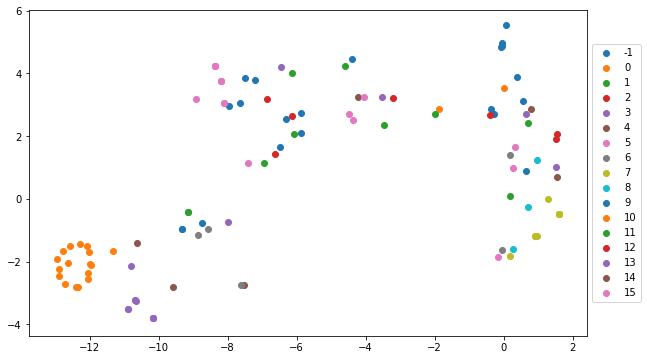

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster = [x['cluster'] for x in coordinates]

plt.figure(3, figsize=(10,6)) 

for i, c in enumerate(np.unique(cluster)):
    x = [x['x'] for x in coordinates if x['cluster'] == c]
    y = [x['y'] for x in coordinates if x['cluster'] == c]
    plt.scatter(x, y, marker="o", cmap='jet', label=c)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

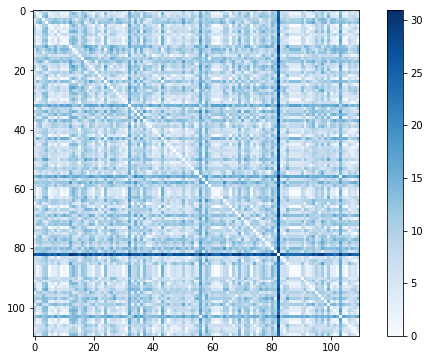

In [41]:
plt.figure(3, figsize=(10,6))
plt.imshow(dist_mat, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.show()